In [1]:
# import edward as ed
import pickle
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
from collections import defaultdict
import scipy
import numpy as np
import pickle
import itertools
from dist_rsa.dbm import *
from dist_rsa.utils.helperfunctions import *
from dist_rsa.utils.config import abstract_threshold,concrete_threshold
from dist_rsa.utils.simple_vecs import real_vecs as simple_vecs
import itertools


/usr/local/anaconda3/envs/pyt/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
simple_vecs

{'subj1': array([1., 0.]),
 'subj2': array([0., 1.]),
 'pred1': array([1., 0.]),
 'pred2': array([0., 1.]),
 'qud1': array([1., 1.]),
 'qud2': array([ 1., -1.]),
 'pred3': array([0.5, 0.5]),
 'pred4': array([-0.5, -0.5]),
 'qud3': array([1., 2.]),
 'the': array([0., 0.]),
 'swimmer': array([0., 1.]),
 'shark': array([1., 1.]),
 'man': array([0., 0.]),
 'vicious': array([1., 0.]),
 'swims': array([0., 3.]),
 'child': array([ 0.1, -1. ]),
 'nightmare': array([1., 1.]),
 'wonder': array([ 1., -1.])}

In [3]:
def titrate(l1_sig1,subj, model_type, quds,pred,possible_utterances,sig1=0.1,sig2=0.1):

    params = Inference_Params(
        vecs=simple_vecs,
        subject=[subj],predicate=pred,
        quds=quds,
        possible_utterances=sorted(list(set(possible_utterances).union(set([pred])))),
        sig1=sig1,sig2=sig2, l1_sig1=l1_sig1,
        qud_weight=0.0,freq_weight=0.0,
        number_of_qud_dimensions=1,
        poss_utt_frequencies=defaultdict(lambda:1),
        qud_frequencies=defaultdict(lambda:1),
        rationality=1.0,
        norm_vectors=False,
        resolution=Resolution(span=2.5,number=100),
        model_type=model_type,
        heatmap=True
        )
    
    run = Dist_RSA_Inference(params)
    run.compute_l1(load=0,save=False)
#     worlds,qud_distribution = run.tf_results
    worlds,qud_distribution = params.worlds,params.qud_marginals
    print("WORLDS",worlds.shape)
    size,amount = run.inference_params.resolution.size, run.inference_params.resolution.amount

    origin = size
    
    def highlight(vec):
        vec = simple_vecs[vec]
    
        for x in range(40):
            worlds[int(origin+1*vec[0])][int(origin+3*vec[1])]=0.2
            worlds[int(origin-1*vec[0])][int(origin-3*vec[1])]=0.2
#             worlds[origin-1*vec[0]][origin-3*vec[1]]=0.2
    
#     highlight(subj)
#     highlight(pred)
#     for qud in quds:
#         highlight(qud)
            
    hm = pnd.DataFrame(np.flip(worlds,axis=0),columns=np.round(np.arange(-size,size+1)*amount,2),index=-np.round(np.arange(-size,size+1)*amount,2))
#     if model_type=="discrete_mixture":
#         hm = pnd.DataFrame((worlds),columns=np.arange(-size,size+1)*amount,index=-np.arange(-size,size+1)*amount)

#     if model_type=="discrete_exact":

#         hm = pnd.DataFrame(worlds,columns=np.arange(-size,size+1)*amount,index=-np.arange(-size,size+1)*amount)
    
#     print("HEATMAP ARRAY:",hm)
    
#     for x in range(20):
#         hm_mix[x]=1
    return hm,qud_distribution




  0%|          | 0/2 [00:00<?, ?it/s]

RESOLUTION. SIZE: 100 AMOUNT: 0.025
subject: ['man']
predicate shark
SIGs 1&2: 5.0 0.5
L1 SIG 5.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 3 possible utterances and 2
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 2 [['swimmer'], ['vicious']]
quds 2
SIZE,AMOUNT 100 0.025
CURRENT QUD: ['swimmer']
(2, 2, 4)
(2, 2, 3, 4)


 50%|█████     | 1/2 [00:02<00:02,  2.88s/it]

CURRENT QUD: ['vicious']


100%|██████████| 2/2 [00:05<00:00,  2.91s/it]


time: 5.855398178100586
time: 1.8308660984039307
HEATMAP MEAN [0.4494445 0.8551974]
time: 9.08033299446106
WORLDS (201, 201)
RESOLUTION. SIZE: 100 AMOUNT: 0.025
subject: ['man']
predicate shark
SIGs 1&2: 5.0 0.5
L1 SIG 5.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_exact RSA with 3 possible utterances and 2
RUNNING DISCRETE EXACT MODEL
QUDS: [['swimmer'], ['vicious']]
sum should be unit 1.0000033
MEAN [0.88410574 0.47621137]
WORLDS (201, 201)
MIXTURE:
MIXTURE QUDS: [0.37702286 0.62297714]


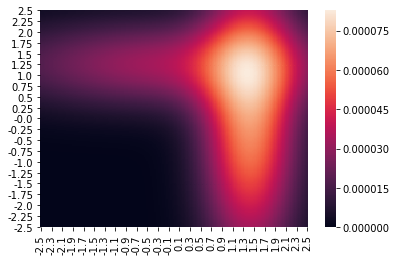

DISCRETE:
DISCRETE QUDS: [(['vicious'], 0.61869043), (['swimmer'], 0.38130337)]


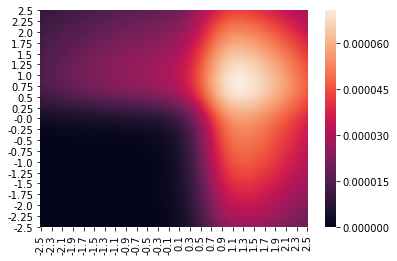

In [4]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",subj="man",quds=['vicious','swimmer'],possible_utterances=["shark","swimmer","man"],pred='shark',sig1=5.0,sig2=0.5,l1_sig1=5.0)
hm_disc,quds_disc = titrate(model_type="discrete_exact",subj="man",quds=['vicious','swimmer'],possible_utterances=["shark","swimmer","man"],pred='shark',sig1=5.0,sig2=0.5,l1_sig1=5.0)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

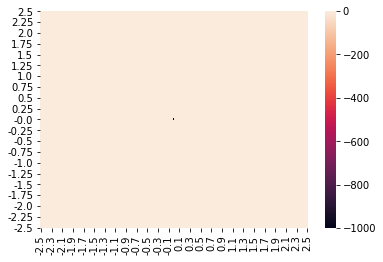

In [49]:
size = 100
amount = 0.025
array  = np.ones((201,201))
array[100:101,100:101]=-1000
# array[63:67,139:142]=-10
# array[100:104,139:142]=-10
hm = pnd.DataFrame(array,columns=np.round(np.arange(-size,size+1)*amount,2),index=-np.round(np.arange(-size,size+1)*amount,2))

seaborn.heatmap(hm)
plt.show()


  0%|          | 0/1 [00:00<?, ?it/s]

RESOLUTION. SIZE: 100 AMOUNT: 0.025
subject: ['man']
predicate swimmer
SIGs 1&2: 3.0 0.1
L1 SIG 3.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 3 possible utterances and 1
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 1 [['swims']]
quds 1
SIZE,AMOUNT 100 0.025
CURRENT QUD: ['swims']


100%|██████████| 1/1 [00:03<00:00,  3.44s/it]


time: 3.449786901473999
time: 1.279252052307129
HEATMAP MEAN [1.3172425e+00 3.2396201e-09]
time: 7.605186939239502
WORLDS (201, 201)
RESOLUTION. SIZE: 100 AMOUNT: 0.025
subject: ['man']
predicate swimmer
SIGs 1&2: 3.0 0.1
L1 SIG 3.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_exact RSA with 3 possible utterances and 1
RUNNING DISCRETE EXACT MODEL
QUDS: [['swims']]
sum should be unit 1.0000001
MEAN [9.5664291e-08 1.3421283e+00]
WORLDS (201, 201)
MIXTURE:
MIXTURE QUDS: [1.]


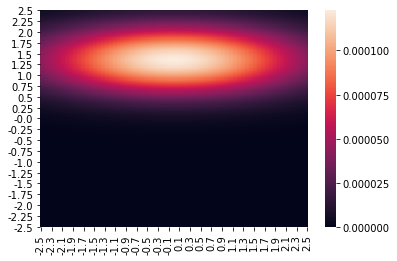

DISCRETE:
DISCRETE QUDS: [(['swims'], 1.0)]


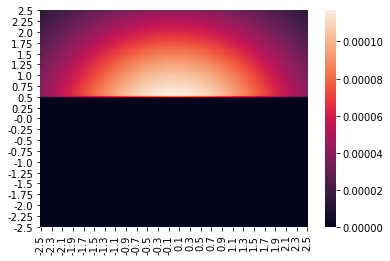

In [8]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",subj="man",quds=['swims'],possible_utterances=["shark","swimmer","man"],pred='swimmer',sig1=3.0,sig2=0.1,l1_sig1=3.0)
hm_disc,quds_disc = titrate(model_type="discrete_exact",subj="man",quds=['swims'],possible_utterances=["shark","swimmer","man"],pred='swimmer',sig1=3.0,sig2=0.1,l1_sig1=3.0)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

  0%|          | 0/4 [00:00<?, ?it/s]

RESOLUTION. SIZE: 100 AMOUNT: 0.025
subject: ['child']
predicate shark
SIGs 1&2: 2.0 0.1
L1 SIG 2.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 3 possible utterances and 4
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 4 [['child'], ['swims'], ['vicious'], ['wonder']]
quds 4
SIZE,AMOUNT 100 0.025
CURRENT QUD: ['child']


 25%|██▌       | 1/4 [00:03<00:10,  3.44s/it]

CURRENT QUD: ['swims']


 50%|█████     | 2/4 [00:06<00:06,  3.24s/it]

CURRENT QUD: ['vicious']


 75%|███████▌  | 3/4 [00:09<00:03,  3.40s/it]

CURRENT QUD: ['wonder']


100%|██████████| 4/4 [00:13<00:00,  3.52s/it]


time: 13.801812887191772
time: 4.506961107254028
HEATMAP MEAN [-0.4972091   0.66071796]
time: 19.55035710334778
WORLDS (201, 201)
RESOLUTION. SIZE: 100 AMOUNT: 0.025
subject: ['child']
predicate shark
SIGs 1&2: 2.0 0.1
L1 SIG 2.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_exact RSA with 3 possible utterances and 4
RUNNING DISCRETE EXACT MODEL
QUDS: [['child'], ['swims'], ['vicious'], ['wonder']]
sum should be unit 1.0000017
MEAN [ 0.6882639 -0.5151402]
WORLDS (201, 201)
MIXTURE:
MIXTURE QUDS: [0.08718454 0.08659166 0.4100938  0.41612998]


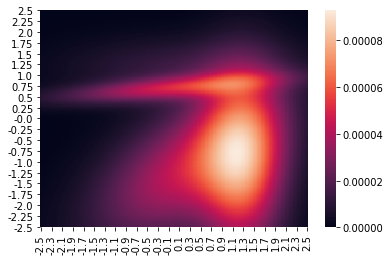

DISCRETE:
DISCRETE QUDS: [(['wonder'], 0.42139068), (['vicious'], 0.40395293), (['swims'], 0.08924836), (['child'], 0.085402034)]


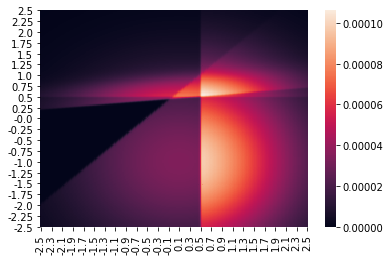

In [6]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",l1_sig1=2.0,subj="child",quds=['vicious','swims','wonder','child'],possible_utterances=["shark","swimmer","man"],pred='shark',sig1=2.0,sig2=0.1)
hm_disc,quds_disc = titrate(model_type="discrete_exact", l1_sig1=2.0,subj="child",quds=['vicious','swims','wonder','child'],possible_utterances=["shark","swimmer","man"],pred='shark',sig1=2.0,sig2=0.1)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()


RESOLUTION. SIZE: 100 AMOUNT: 0.025
subject: ['man']
predicate swimmer
SIGs 1&2: 5.0 0.5
L1 SIG 5.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 3 possible utterances and 2
RUNNING DISCRETE MIXTURE MODEL


  0%|          | 0/2 [00:00<?, ?it/s]

qud_combinations 2 [['swims'], ['vicious']]
quds 2
SIZE,AMOUNT 100 0.025
CURRENT QUD: ['swims']


 50%|█████     | 1/2 [00:02<00:02,  2.70s/it]

(2, 2, 4)
(2, 2, 3, 4)
CURRENT QUD: ['vicious']


100%|██████████| 2/2 [00:05<00:00,  2.50s/it]


time: 5.005783319473267
time: 0.9920904636383057
HEATMAP MEAN [ 0.4490106 -0.4634461]
time: 9.969401597976685
WORLDS (201, 201)
MIXTURE:
MIXTURE QUDS: [(['vicious'], 0.611228), (['swims'], 0.388772)]


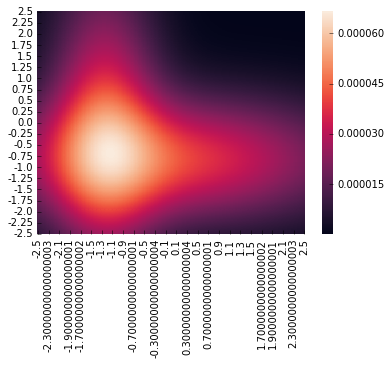

In [4]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",subj="man",quds=['vicious','swims'],possible_utterances=["shark","swimmer","man"],pred='swimmer',sig1=5.0,sig2=0.5,l1_sig1=5.0)
# hm_disc,quds_disc = titrate(model_type="discrete_exact",subj="child",quds=['vicious','wonder'],possible_utterances=["shark","swimmer","man"],pred='shark',sig1=5.0,sig2=0.5,l1_sig1=5.0)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
# print("DISCRETE:")
# seaborn.heatmap(hm_disc)
# print("DISCRETE QUDS:",quds_disc)
# plt.show()

  0%|          | 0/2 [00:00<?, ?it/s]

RESOLUTION. SIZE: 100 AMOUNT: 0.025
subject: ['child']
predicate shark
SIGs 1&2: 5.0 0.5
L1 SIG 5.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 3 possible utterances and 2
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 2 [['vicious'], ['wonder']]
quds 2
SIZE,AMOUNT 100 0.025
CURRENT QUD: ['vicious']


 50%|█████     | 1/2 [00:03<00:03,  3.12s/it]

CURRENT QUD: ['wonder']


100%|██████████| 2/2 [00:06<00:00,  3.13s/it]


time: 6.273325204849243
time: 1.486943244934082
Tensor("stack_20:0", shape=(2, 201, 201), dtype=float32)
heatmap mean [ 0.8897789  -0.55927473]
marginal means [0.87639812 1.41713801]
time: 10.311936140060425
WORLDS (201, 201)
MIXTURE:
MIXTURE QUDS: [(['wonder'], 'n/a', 0.51491207), (['vicious'], 'n/a', 0.48508784)]


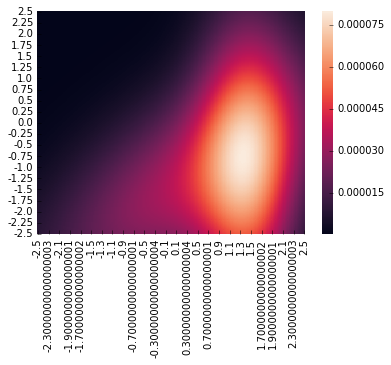

In [7]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",subj="child",quds=['vicious','wonder'],possible_utterances=["shark","swimmer","man"],pred='shark',sig1=5.0,sig2=0.5,l1_sig1=5.0)
# hm_disc,quds_disc = titrate(model_type="discrete_exact",subj="child",quds=['vicious','wonder'],possible_utterances=["shark","swimmer","man"],pred='shark',sig1=5.0,sig2=0.5,l1_sig1=5.0)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
# print("DISCRETE:")
# seaborn.heatmap(hm_disc)
# print("DISCRETE QUDS:",quds_disc)
# plt.show()

RESOLUTION. SIZE: 100 AMOUNT: 0.025
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_exact RSA with 3 possible utterances and 1
RUNNING DISCRETE EXACT MODEL
QUDS: [['swims']]
(1, 3, 2) (1, 1, 2)
(1, 3) shape out
MEAN [-1.8887931e-09  1.0989000e+00]
EXACT QUDS:               -2.500        -2.475        -2.450        -2.425        -2.400  \
-2.500  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-2.475  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-2.450  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-2.425  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-2.400  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-2.375  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-2.350  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-2.325  0.000000e+00  0.

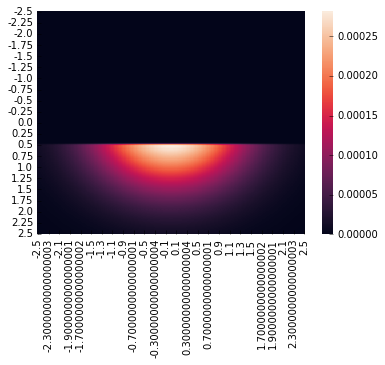

In [8]:
hm_ex,quds_ex = titrate(model_type="discrete_exact",l1_sig1=1.0,sig1=1.0,sig2=0.1,subj="man",quds=['swims'],possible_utterances=["shark","swimmer","man"],pred='shark')
seaborn.heatmap(hm_ex)
print("EXACT QUDS:",hm_ex)
plt.show()
plt.close()

RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate swimmer
SIGs 1&2: 1.0 1.0
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_exact RSA with 3 possible utterances and 1
RUNNING DISCRETE EXACT MODEL
QUDS: [['vicious']]
(1, 3, 2) (1, 1, 2)
(1, 3) shape out
MEAN [-2.63465106e-01  1.07822245e-07]
EXACT QUDS: [(['swims'], 1.0)]


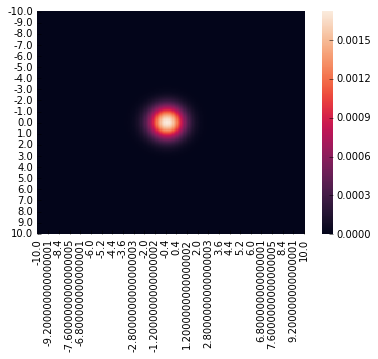

In [53]:
hm_ex,quds_ex = titrate(model_type="discrete_exact",l1_sig1=1.0,sig1=1.0,sig2=1.0,subj="man",quds=['vicious'],possible_utterances=["shark","swimmer","man"],pred='swimmer')
seaborn.heatmap(hm_ex)
print("EXACT QUDS:",quds_mix)
plt.show()
plt.close()

RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 2 possible utterances and 3
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 3 [['swims'], ['vicious'], ['wonder']]
quds 3
QUD MATRIX SHAPE Tensor("Cast_67:0", shape=(3, 2, 1), dtype=float32)
SIZE,AMOUNT 100 0.1
discrete_worlds Tensor("Const_26:0", shape=(40401, 2), dtype=float32)
['swims'] CURRENT QUD
(3, 2, 2) (3, 1, 2)
(3, 2) shape out
['vicious'] CURRENT QUD
(3, 2, 2) (3, 1, 2)
(3, 2) shape out
['wonder'] CURRENT QUD
(3, 2, 2) (3, 1, 2)
(3, 2) shape out
(3, 2, 2) (3, 1, 2)
(3, 2) shape out
QUD ['swims']
DETERMINANT 39.47832
MEAN [0.0000000e+00 7.0401427e-07]
QUD SCORE TERMS [1.8378758, -0.69314575, -1.837877]
QUD SCORE -0.69314694
(3, 2, 2) (3, 1, 2)
(3, 2) shape out
QUD ['vicious']
DETERMINANT 10.722193
MEAN [1.1310866 0.       ]
QUD SCORE TERMS [1.1861578, 0.0, -2.4775553]
QUD SCORE -1.2913975
(3, 2, 2) (3, 1

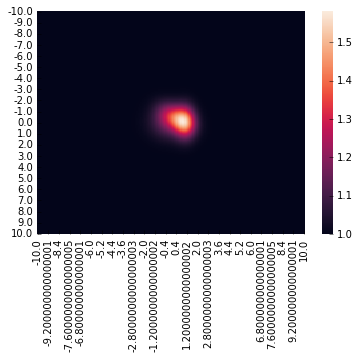

DISCRETE:
DISCRETE QUDS: [(['wonder'], 0.43908283), (['swims'], 0.34498337), (['vicious'], 0.215931)]


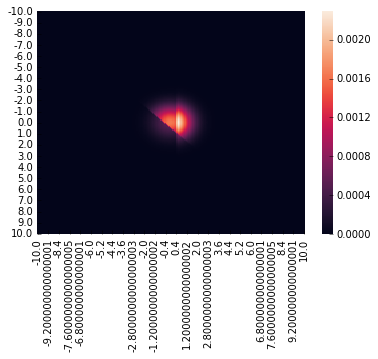

In [26]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",l1_sig1=1.0,subj="man",quds=['vicious','swims','wonder'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)
hm_disc,quds_disc = titrate(model_type="discrete_exact", l1_sig1=1.0,subj="man",quds=['vicious','swims','wonder'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 3 possible utterances and 2
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 2 [['swims'], ['vicious']]
quds 2
QUD MATRIX SHAPE Tensor("Cast_78:0", shape=(2, 2, 1), dtype=float32)
SIZE,AMOUNT 100 0.1
discrete_worlds Tensor("Const_31:0", shape=(40401, 2), dtype=float32)
['swims'] CURRENT QUD
(2, 3, 2) (2, 1, 2)
(2, 3) shape out
['vicious'] CURRENT QUD
(2, 3, 2) (2, 1, 2)
(2, 3) shape out
(2, 3, 2) (2, 1, 2)
(2, 3) shape out
QUD ['swims']
DETERMINANT 10.798546
MEAN [0.        1.1209425]
QUD SCORE TERMS [1.1897057, -0.6931472, -2.466133]
QUD SCORE -1.9695746
(2, 3, 2) (2, 1, 2)
(2, 3) shape out
QUD ['vicious']
DETERMINANT 10.618218
MEAN [1.1434448 0.       ]
QUD SCORE TERMS [1.1812856, 0.0, -2.49161]
QUD SCORE -1.3103244
['swims'] [array([0.       , 1.1209425], dtype=float32)]
[[1.1209425]]
['vicious'] [array([1.14344

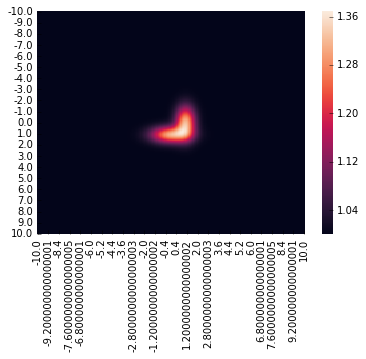

DISCRETE:
DISCRETE QUDS: [(['vicious'], 0.6587094), (['swims'], 0.34128937)]


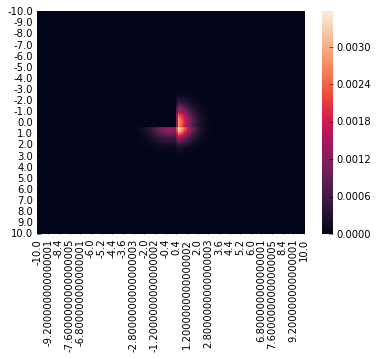

In [27]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",l1_sig1=1.0,subj="man",quds=['vicious','swims'],possible_utterances=["shark","swimmer","man"],pred='shark',sig1=1.0,sig2=0.1)
hm_disc,quds_disc = titrate(model_type="discrete_exact", l1_sig1=1.0,subj="man",quds=['vicious','swims'],possible_utterances=["shark","swimmer","man"],pred='shark',sig1=1.0,sig2=0.1)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 2 possible utterances and 1
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 1 [['nightmare']]
quds 1
QUD MATRIX SHAPE Tensor("Cast_89:0", shape=(1, 2, 1), dtype=float32)
SIZE,AMOUNT 100 0.1
discrete_worlds Tensor("Const_35:0", shape=(40401, 2), dtype=float32)
['nightmare'] CURRENT QUD
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
QUD ['nightmare']
DETERMINANT 7.623828
MEAN [1.1071142 1.1071142]
QUD SCORE TERMS [1.0156393, 0.0, -3.0635788]
QUD SCORE -2.0479395
['nightmare'] [array([1.1071142, 1.1071142], dtype=float32)]
[[1.5656961]]
RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_exact RSA with 2 possible utterances and 1
RUNNING DISCRETE EXACT MODEL
QUDS: [['nightmare']]
(1, 2,

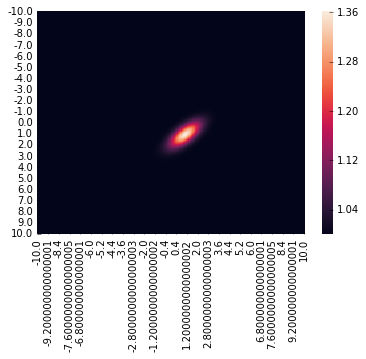

DISCRETE:
DISCRETE QUDS: [(['nightmare'], 1.0)]


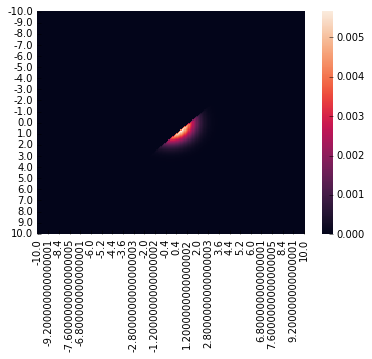

In [29]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",l1_sig1=1.0,subj="man",quds=['nightmare'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)
hm_disc,quds_disc = titrate(model_type="discrete_exact", l1_sig1=1.0,subj="man",quds=['nightmare'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()



RESOLUTION. SIZE: 100 AMOUNT: 0.1
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
number of qud dimensions: 1
rationality: 1.0
Running discrete_mixture RSA with 2 possible utterances and 2
RUNNING DISCRETE MIXTURE MODEL
qud_combinations 2 [['swims'], ['vicious']]
quds 2
QUD MATRIX SHAPE Tensor("Cast_255:0", shape=(2, 2, 1), dtype=float32)
SIZE,AMOUNT 100 0.1
discrete_worlds Tensor("Const_85:0", shape=(40401, 2), dtype=float32)
['swims'] CURRENT QUD
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
['vicious'] CURRENT QUD
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
QUD ['swims']
DETERMINANT 39.47832
MEAN [0.0000000e+00 7.0401427e-07]
QUD SCORE TERMS [1.8378758, -0.69314575, -1.837877]
QUD SCORE -0.69314694
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
QUD ['vicious']
DETERMINANT 10.722193
MEAN [1.1310866 0.       ]
QUD SCORE TERMS [1.1861578, 0.0, -2.4775553]
QUD SCORE -1.2913975
['swims'] [array([0.0000000e+00, 7.0401427e-07], dtype=float32)]
[[7.0401427e-07]]
['v

(2, 2, 2) (2, 1, 2)
(2, 2) shape out
MEAN [4.3542430e-01 3.3277527e-07]
HEATMAP ARRAY:               -10.0         -9.9          -9.8          -9.7          -9.6   \
-10.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.9   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.8   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.7   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.6   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.5   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.4   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.3   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.2   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.1   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
-9.0   0.000000e+00  0.000000e+00  0.000000e

MIXTURE QUDS: [(['swims'], 0.6452559), (['vicious'], 0.35474405)]


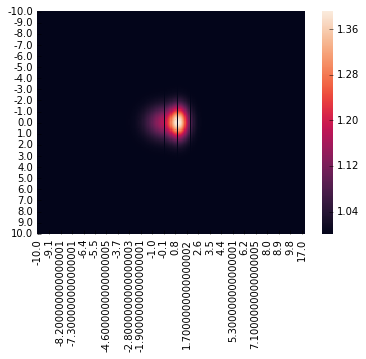

DISCRETE:
DISCRETE QUDS: [(['swims'], 0.615034), (['vicious'], 0.3849603)]


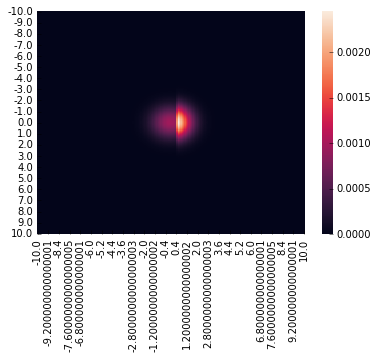

In [55]:
hm_mix,quds_mix = titrate(model_type="discrete_mixture",l1_sig1=1.0,subj="man",quds=['vicious','swims'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)
hm_disc,quds_disc = titrate(model_type="discrete_exact", l1_sig1=1.0,subj="man",quds=['vicious','swims'],possible_utterances=["shark","swimmer"],pred='shark',sig1=1.0,sig2=0.1)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()
